# **1. Perkenalan Dataset**


#### **A. Identitas Dataset**:  
*   **Sumber Data**: [Kaggle - Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download)
*  **Konteks**: Data ini berisi informasi tentang perusahaan telekomunikasi fiktif yang menyediakan layanan telepon rumah dan internet kepada 7.043 pelanggan di California pada kuartal ketiga.
* **Tujuan Utama**: Memprediksi perilaku pelanggan untuk membantu program retensi (mencegah churn).

---
#### **B. Struktur Dataset**:  
Dataset ini terdiri dari **7.043 baris** (records) dan **21 kolom** (features). Namun untuk eksperimen ini, hanya diambil **1000 baris** data. Secara umum, variabelnya dibagi menjadi informasi demografis, layanan, dan finansial.

**1) Informasi Pelanggan (Demografis)**
| Nama Kolom | Deskripsi |
| :--- | :--- |
| `customerID` | ID unik untuk setiap pelanggan |
| `gender` | Jenis kelamin pelanggan (Male, Female) |
| `SeniorCitizen` | Apakah pelanggan adalah lansia (1, 0) |
| `Partner` | Apakah pelanggan memiliki pasangan (Yes, No) |
| `Dependents` | Apakah pelanggan memiliki tanggungan (Yes, No) |

**2) Informasi Layanan (Services)**
| Nama Kolom | Deskripsi |
| :--- | :--- |
| `tenure` | Jumlah bulan pelanggan telah berlangganan |
| `PhoneService` | Apakah pelanggan memiliki layanan telepon (Yes, No) |
| `MultipleLines` | Apakah memiliki banyak saluran (Yes, No, No phone service) |
| `InternetService` | Provider internet (DSL, Fiber optic, No) |
| `OnlineSecurity` | Apakah memiliki keamanan online (Yes, No, No internet service) |
| `OnlineBackup` | Apakah memiliki cadangan online (Yes, No, No internet service) |
| `DeviceProtection` | Apakah memiliki perlindungan perangkat (Yes, No, No internet service) |
| `TechSupport` | Apakah memiliki dukungan teknis (Yes, No, No internet service) |
| `StreamingTV` | Apakah memiliki layanan streaming TV (Yes, No, No internet service) |
| `StreamingMovies` | Apakah memiliki layanan streaming film (Yes, No, No internet service) |

**3) Informasi Akun & Finansial**
| Nama Kolom | Deskripsi |
| :--- | :--- |
| `Contract` | Jenis kontrak (Month-to-month, One year, Two year) |
| `PaperlessBilling` | Apakah menggunakan tagihan tanpa kertas (Yes, No) |
| `PaymentMethod` | Metode pembayaran (Electronic check, Mailed check, Bank transfer, Credit card) |
| `MonthlyCharges` | Biaya yang dikenakan setiap bulan |
| `TotalCharges` | Total biaya yang telah dibayarkan pelanggan |
| `Churn` | Apakah pelanggan berhenti berlangganan (Yes, No) |

# **2. Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# **3. Memuat Dataset**

In [2]:
df = pd.read_csv('TelcoCustomerChurn_raw.csv')

In [3]:
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
display(df.describe())

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# **4. Exploratory Data Analysis (EDA)**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7788\991124703.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


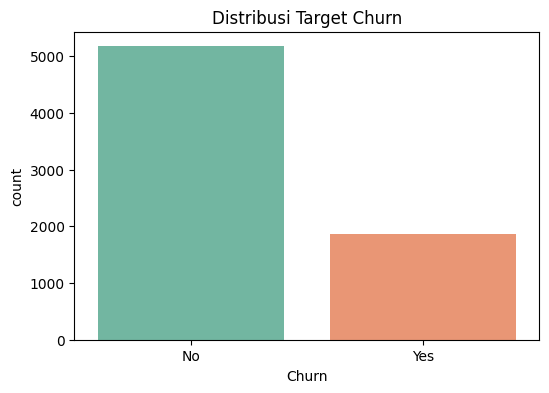

In [6]:
# Distribusi target

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='Set2')   
plt.title('Distribusi Target Churn')
plt.show()

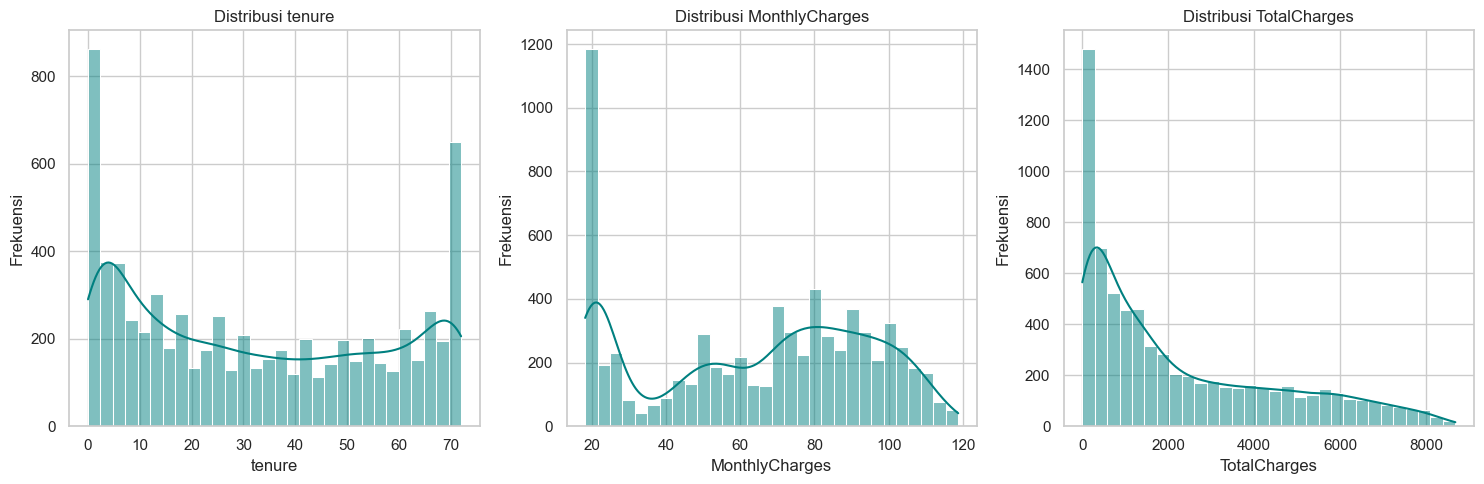

In [7]:
# Distribusi fitur numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, color='teal', bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

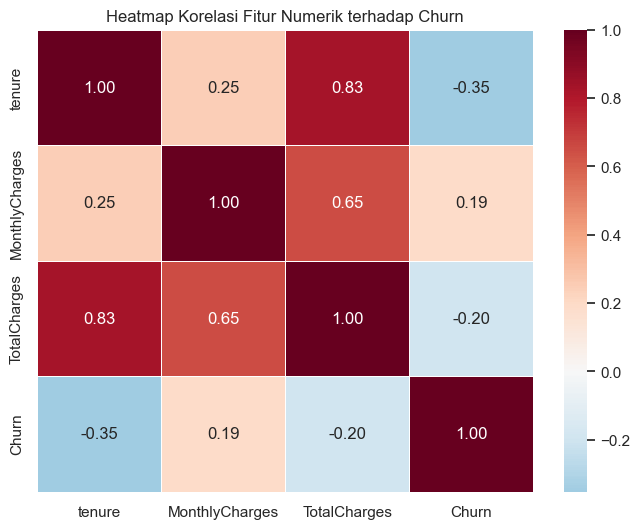

In [8]:
# Heatmap korelasi fitur numerik terhadap Churn

plt.figure(figsize=(8, 6))
df_corr = df[numeric_cols].copy()
df_corr['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

correlation_matrix = df_corr.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik terhadap Churn')
plt.show()

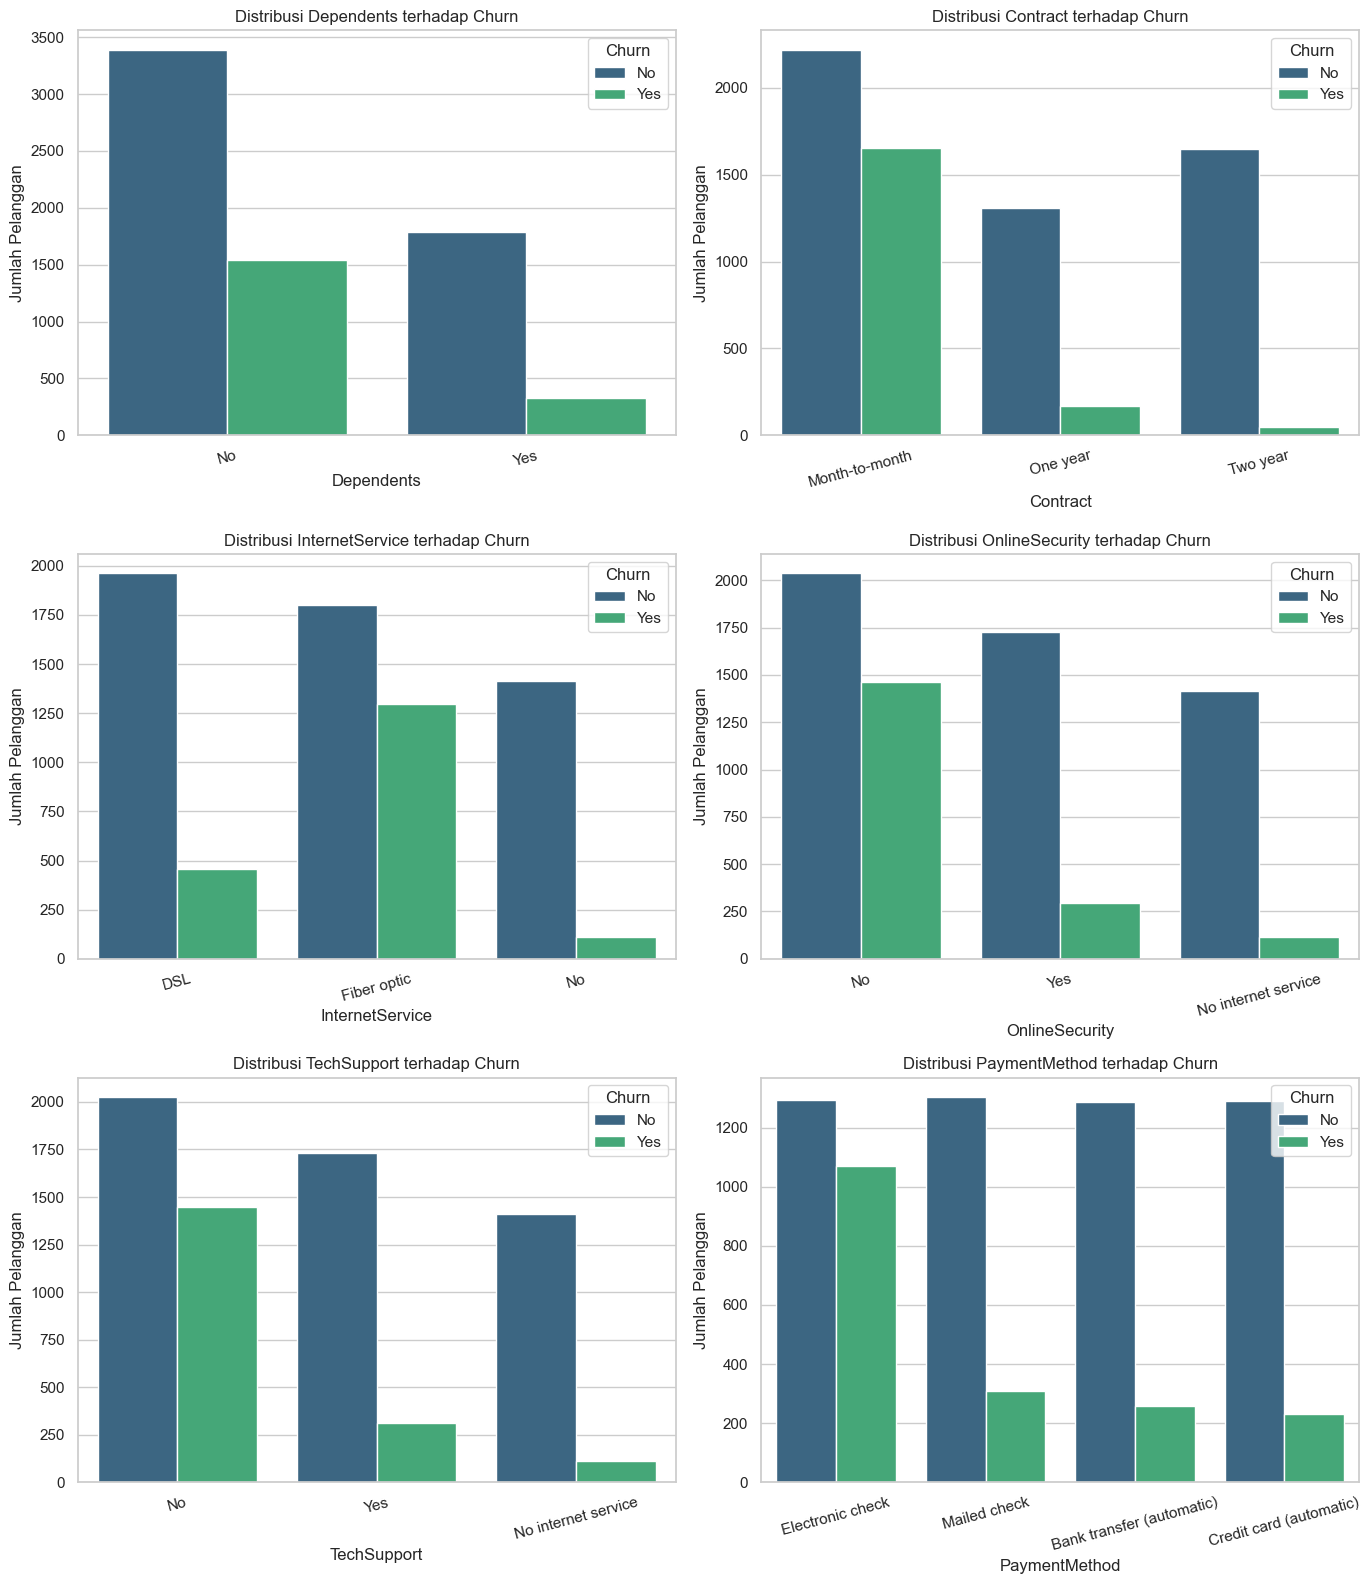

In [9]:
# Pengaruh beberapa fitur kategorikal terhadap Churn

cols_to_plot = ['Dependents', 'Contract', 'InternetService', 'OnlineSecurity', 'TechSupport', 'PaymentMethod']
plt.figure(figsize=(14, 16))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, hue='Churn', palette='viridis')
    plt.title(f'Distribusi {col} terhadap Churn')
    plt.xticks(rotation=15)
    plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()

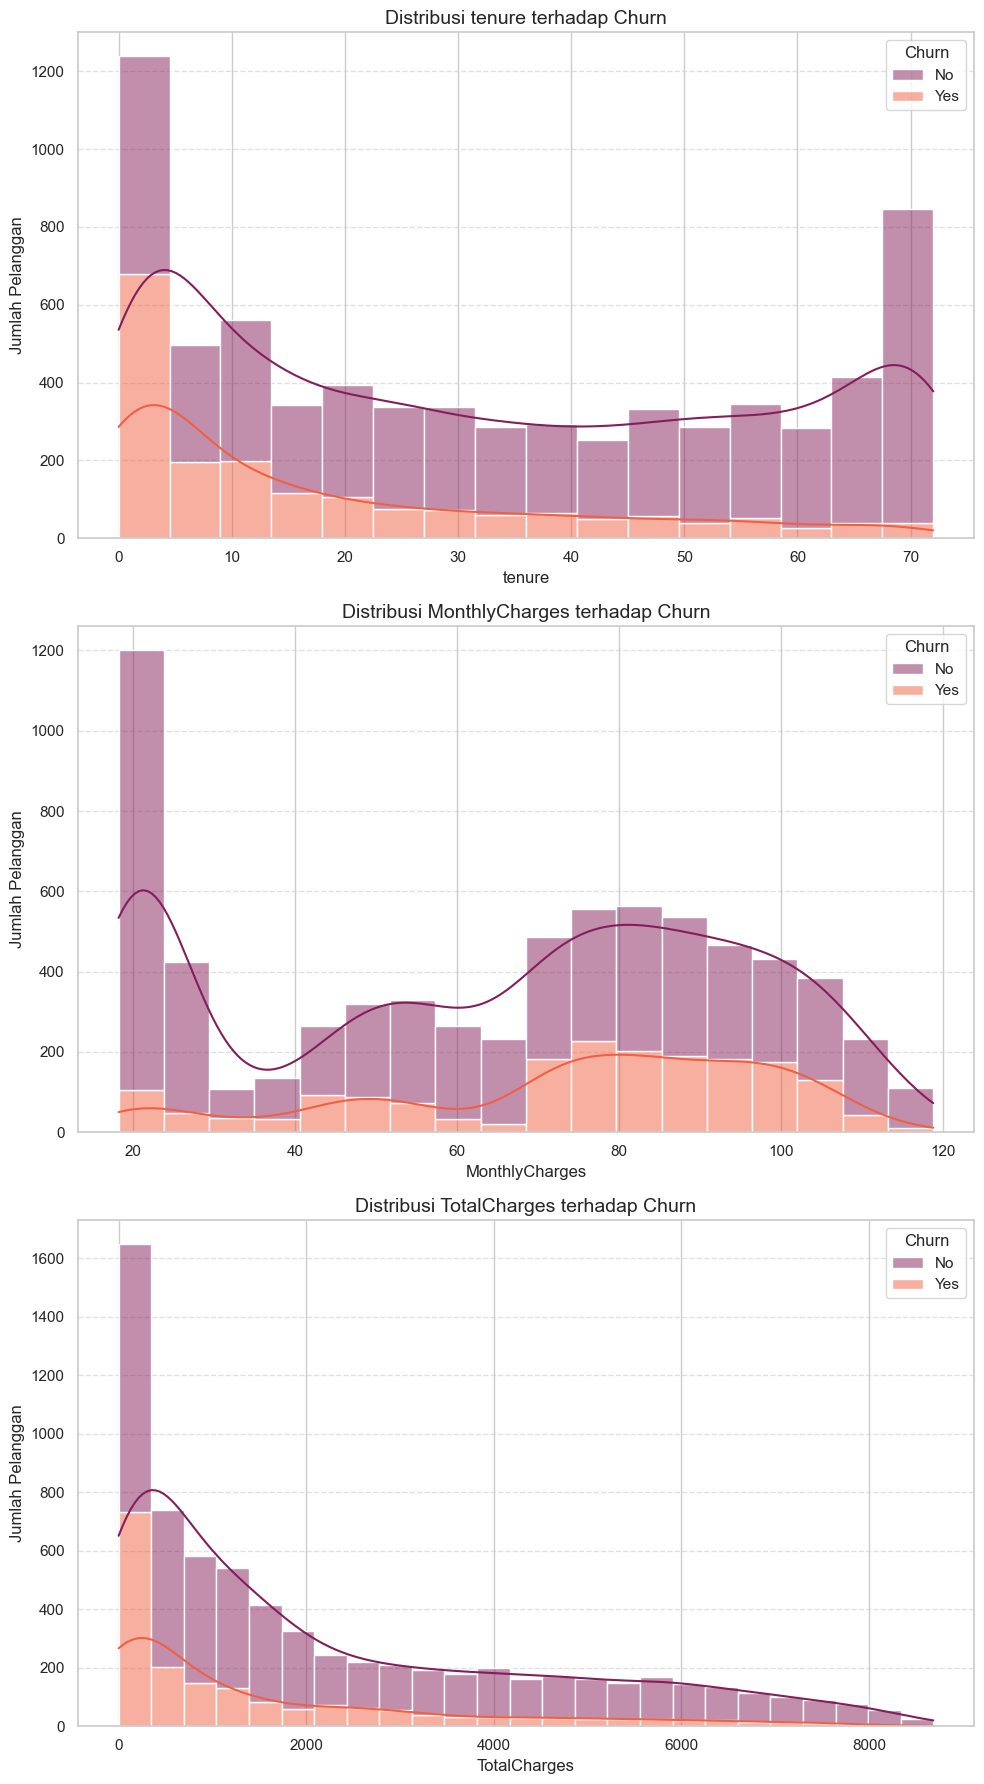

In [10]:
# Pengaruh beberapa fitur numerik terhadap Churn

plt.figure(figsize=(10, 18))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 1, i) 
    sns.histplot(data=df, x=col, hue='Churn', kde=True, multiple="stack", palette='rocket')
    plt.title(f'Distribusi {col} terhadap Churn', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Jumlah Pelanggan')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

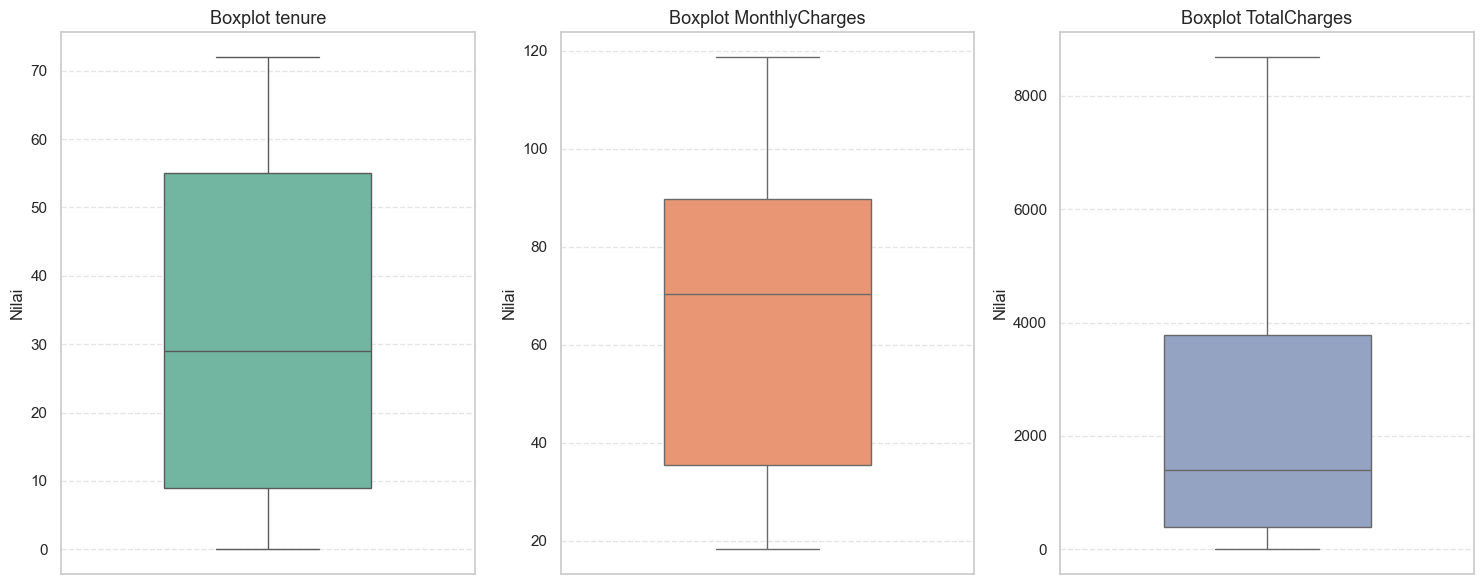

In [11]:
# Boxplot fitur numerik

colors = ['#66c2a5', '#fc8d62', '#8da0cb']
plt.figure(figsize=(15, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, y=col, color=colors[i], width=0.5)
    plt.title(f'Boxplot {col}', fontsize=13)
    plt.ylabel('Nilai')
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

In [12]:
# hapus data duplikat

df.drop_duplicates(inplace=True)

In [13]:
# cleaning dasar

df.drop('customerID', axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
# downsampling, hanya ambil 1000 baris data

df_churn_yes = df[df['Churn'] == 'Yes'].head(500)
df_churn_no = df[df['Churn'] == 'No'].head(500)

df = pd.concat([df_churn_yes, df_churn_no])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [15]:
# definisikan numeric dan categorical cols

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = [
        'gender', 'SeniorCitizen', 'Partner', 'Dependents', 
        'PhoneService', 'MultipleLines', 'InternetService', 
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
        'TechSupport', 'StreamingTV', 'StreamingMovies', 
        'Contract', 'PaperlessBilling', 'PaymentMethod'
]

In [16]:
# handling missing value numerik

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# handling missing value kategorikal

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [17]:
# deteksi outlier dengan IQR

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"Fitur: {col}")
    print(f"  - Batas Bawah: {lower_bound:.2f}")
    print(f"  - Batas Atas : {upper_bound:.2f}")
    print(f"  - Jumlah Outlier: {len(outliers)}")
    print("-" * 30)

Fitur: tenure
  - Batas Bawah: -59.50
  - Batas Atas : 112.50
  - Jumlah Outlier: 0
------------------------------
Fitur: MonthlyCharges
  - Batas Bawah: -17.75
  - Batas Atas : 160.25
  - Jumlah Outlier: 0
------------------------------
Fitur: TotalCharges
  - Batas Bawah: -4373.86
  - Batas Atas : 8016.39
  - Jumlah Outlier: 11
------------------------------


In [18]:
# handling outlier dengan winsorizing

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [19]:
# standarisasi fitur numerik dengan StandardScaler

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [20]:
# encoding fitur kategorikal dengan one-hot encoding

ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=int)
ohe_data = ohe.fit_transform(df[categorical_cols])
ohe_df = pd.DataFrame(ohe_data, columns=ohe.get_feature_names_out(categorical_cols))

df = df.drop(columns=categorical_cols).reset_index(drop=True)
df = pd.concat([df, ohe_df], axis=1)

In [21]:
# Encoding target dengan mapping manual

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [22]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.013309,-0.138281,-0.091918,0,0,0,1,1,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0.321505,0.754466,0.531459,0,1,0,1,0,1,0,...,0,1,0,0,0,0,1,1,0,0
2,-0.766640,-0.756336,-0.756605,0,0,0,1,1,1,0,...,0,0,0,0,1,0,0,0,0,1
3,1.409650,-1.772341,-0.435327,0,1,0,0,1,1,0,...,1,0,1,0,0,1,0,0,0,1
4,-0.724789,0.890051,-0.538704,1,1,1,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0


In [23]:
# simpan dataset yang sudah dipreprocessing

output_filename = "TelcoCustomerChurn_preprocessing.csv"
df.to_csv(output_filename, index=False)

print(f"Dataset preprocessing berhasil disimpan ke: {output_filename}")

Dataset preprocessing berhasil disimpan ke: TelcoCustomerChurn_preprocessing.csv
